### All the csv files are expected to be placed parallely to this notebook

In [1]:
#importing the nedded modules
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#Ignoring the warnings
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning 1

In [3]:
#Reading the companies data table
companies = pd.read_csv("companies.csv",encoding = "palmos")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
#reading the rounds2 data table
rounds2 = pd.read_csv("rounds2.csv",encoding = "palmos")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#Using the permalink and converting it to lower case to find the unique comapnies in the companies column
companies['permalink'] = companies['permalink'].apply(lambda x:x.lower())
UniqCompInCompanies = pd.unique(companies['permalink'])
len(UniqCompInCompanies)

66368

In [6]:
#Using the company_permalink and converting it to lower case to find the unique comapnies in the rounds2 column
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.lower())
UniqCompInRounds2 = pd.unique(rounds2['company_permalink'])
len(UniqCompInRounds2)

66368

In [7]:
#Checking whether there are any companies in the rounds2 file which are not present in companies
UniqCompInRounds2 = set(UniqCompInRounds2)
UniqCompInCompanies = set(UniqCompInCompanies)
len(UniqCompInRounds2 - UniqCompInCompanies)

0

In [8]:
''''Merging two dataframes. Renaming the permalink to compnay_permalink in companies so that the merged dataset won't contain 
both the column names which is duplicate info.'''
companies.rename(columns={"permalink": "company_permalink"},inplace=True)
master_frame = rounds2.merge(right = companies, how = 'inner', on = 'company_permalink' )
master_frame.shape

(114949, 15)

# Further Data cleaning
1. Drop the companies with the null in the raised amount - We can't take risk in imputing mean/median here, because it is the target variable
2. filter the four fund types which we need.
3. Remove the companies with null home page. - If the homepage url is none, we can't reach the company to invest.
4. Remove the companies with null in the category list - If the category list is null, we can't categorize it to any sector.
5. Remove the closed companies from the list - If the company is closed, we can't invest in the company anymore.
6. Remove the companies having the country as empty



In [9]:
master_frame.dropna(subset = ['raised_amount_usd'],inplace=True)
master_frame.shape

(94959, 15)

In [10]:
master_frame = master_frame[master_frame.funding_round_type.apply(lambda x: x in ['seed','venture','angel','private_equity'])]
master_frame.shape

(80627, 15)

In [11]:
master_frame.homepage_url.isna().sum()
master_frame.dropna(subset = ['homepage_url'],inplace=True)
master_frame.shape

(77182, 15)

In [12]:
master_frame.category_list.isna().sum()
master_frame.dropna(subset = ['category_list'],inplace=True)
master_frame.shape

(76580, 15)

In [13]:
master_frame = master_frame[master_frame.status != 'closed']
master_frame.shape

(71119, 15)

In [14]:
master_frame.country_code.isna().sum()
master_frame.dropna(subset = ['country_code'],inplace=True)
master_frame.shape

(67803, 15)

# Checkpoint 2: Funding Type Analysis

In [15]:
#Grouping the data by the funding round type
investmentGroup = master_frame.groupby(['funding_round_type'])

In [16]:
#Copying the data to use in the Checkpoint 6 to plot the representative values of the investment Types.
InvestmentTypes = master_frame

In [17]:
#Getting the statistics for the investment group
investmentGroup.describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         3926.0  9.937141e+05  8.151063e+06  0.0   
private_equity                1657.0  7.655723e+07  2.094937e+08  0.0   
seed                         19414.0  7.665896e+05  2.348543e+06  0.0   
venture                      42806.0  1.187147e+07  9.007686e+07  0.0   

                                                                      
                           25%         50%         75%           max  
funding_round_type                                                    
angel                157932.00    416580.0   1000000.0  4.945120e+08  
private_equity      5250000.00  21000000.0  77766000.0  4.745460e+09  
seed                  75000.00    320000.0   1000000.0  2.000000e+08  
venture             1655175.25   5000000.0  12000000.0  1.760000e+10

## From the above statistics, it is clear that the mean is impacted more with the outliers, so we can treat Medain as the representative value for all the funding. And the "Venture" is the most suitable funding type for the Spark Funds.

In [18]:
#Filtering the venture investment type from master dataframe
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame.shape

(42806, 15)

# Checkpoint 3: Country Analysis

In [19]:
#Grouping the data by the country code
CountryGroup = master_frame.groupby(['country_code'])

In [20]:
#Getting the top9 company names
Top9Countries = list(CountryGroup.sum().sort_values(by = 'raised_amount_usd',ascending = False).index[0:9])

In [21]:
#Storing the top 9 companies data in the top9 dataframe
top9 = master_frame[master_frame['country_code'].apply(lambda x: x in Top9Countries)]
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [22]:
#Sorting the top 9 companies depending on the investment value
top9CountryGroup = top9.groupby(['country_code'])
top9CountryGroup.sum().sort_values(by = 'raised_amount_usd',ascending = False)

,raised_amount_usd
country_code,
USA,3.781803e+11
CHN,3.729689e+10
GBR,1.754061e+10
IND,1.359137e+10
CAN,8.291134e+09
FRA,6.585785e+09
ISR,6.292157e+09
DEU,5.952924e+09
JPN,3.144210e+09


## USA, GBR and IND are the top 3 english speaking countries

In [23]:
#Filtering the top 3 english speaking countries from master frame
master_frame = master_frame[master_frame['country_code'].apply(lambda x: x in ['USA','GBR','IND'])]
master_frame.shape

(34650, 15)

# Checkpoint 4: Sector Analysis 1

In [24]:
#Extracting the Primary sector from the category list and adding it to the dataframe
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split("|")[0])
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps


In [25]:
#Reading the Mapping CSV
sector_map = pd.read_csv('mapping.csv',keep_default_na= False)
sector_map.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [26]:
#Replacing the 0s with na (Na) in mapping file. If the 0 found at the start, replacing it with Na, else replacing it wiht na
def Replace0(x):
    x = re.sub("^0", "Na", x)
    x = re.sub("0", "na", x)
    x = re.sub("\.na",".0",x)#Hadling the "Enterprise 2.0" Case
    return x
sector_map['category_list'] = sector_map['category_list'].apply(lambda x: Replace0(x))

In [27]:
#Converting the Wide to Long format so that the primary sector to Main sector mapping will be easilt done
sector_map = pd.melt(sector_map, id_vars=['category_list'])
sector_map = sector_map[sector_map['value']==1]
sector_map.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [28]:
#Dropping the value column and renaming the variable column to the Main_sector
sector_map.drop(labels = 'value', axis = 1,inplace=True)
sector_map.rename(columns={"variable": "Main_Sector"},inplace=True)
sector_map.head()

,category_list,Main_Sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [29]:
'''Renaming the Category list to the Primary sector so that we can merge with the master frame and to avoid the duplicate
columns in the dataframe'''
sector_map.rename(columns={"category_list": "primary_sector"},inplace=True)

In [30]:
#Merging the master_frame and the sector map. Now the masterframe contains the primary_sector and the Main_Sector info
master_frame = master_frame.merge(right = sector_map, how = 'outer', on = 'primary_sector' )
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,Main_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment


# Checkpoint 5: Sector Analysis 2

In [31]:
#Filtering the investments in the range of 5M to 15M USD
FiveToFifteenM = master_frame[master_frame['raised_amount_usd'].between(5000000,15000000)]
#Creating the D1, D2 and D3 dataframes
D1 = FiveToFifteenM[(master_frame['country_code']=='USA')]
D2 = FiveToFifteenM[master_frame['country_code']=='GBR']
D3 = FiveToFifteenM[master_frame['country_code']=='IND']

In [32]:
#function to print the Observations of each country investment data
def FinalStatistics(DataFrame):
    print("Total Number of Investments:",DataFrame['raised_amount_usd'].count(),"\n")
    print("Total Amount of Investment (USD):",DataFrame['raised_amount_usd'].sum(),"\n")
    MainCateGroup = DataFrame.groupby(['Main_Sector'])
    
    TopSector = MainCateGroup['raised_amount_usd'].count().sort_values(ascending = False).index[0]
    print("Top Sector name (no. of investment-wise):",TopSector)
    print("Number of investments in top sector:",
          MainCateGroup['raised_amount_usd'].count().sort_values(ascending = False)[0],"\n")
    
    SecondBestSector = MainCateGroup['raised_amount_usd'].count().sort_values(ascending = False).index[1]
    print("Second Sector name (no. of investment-wise):",SecondBestSector)
    print("Number of investments in second sector:",
          MainCateGroup['raised_amount_usd'].count().sort_values(ascending = False)[1],"\n")
    
    ThirdBestSector = MainCateGroup['raised_amount_usd'].count().sort_values(ascending = False).index[2]
    print("Third Sector name (no. of investment-wise):",ThirdBestSector)
    print("Number of investments in second sector:",
          MainCateGroup['raised_amount_usd'].count().sort_values(ascending = False)[2],"\n")
    
    TopSCompanyGroup = DataFrame[DataFrame['Main_Sector'] == TopSector].groupby(['company_permalink'])
    TopSectorCompany = TopSCompanyGroup['raised_amount_usd'].sum().sort_values(ascending = False).index[0]
    print("Company that has recieved the highest investment from the Top Sector:",
          companies[companies['company_permalink'] == TopSectorCompany].name.values[0],"\n")
    
    SBSCompanyGroup = DataFrame[DataFrame['Main_Sector'] == SecondBestSector].groupby(['company_permalink'])
    SecondBestCateCompany = SBSCompanyGroup['raised_amount_usd'].sum().sort_values(ascending = False).index[0]
    print("Company that has recieved the highest investment from the Second Sector:",
          companies[companies['company_permalink'] == SecondBestCateCompany].name.values[0])
    
    Top3Sectors = [TopSector,SecondBestSector,ThirdBestSector]
    return Top3Sectors

In [33]:
#Country 1 Investment Data
D1Top3Sectors = FinalStatistics(D1)

Total Number of Investments: 10771 

Total Amount of Investment (USD): 96360260362.0 

Top Sector name (no. of investment-wise): Others
Number of investments in top sector: 2570 

Second Sector name (no. of investment-wise): Social, Finance, Analytics, Advertising
Number of investments in second sector: 2539 

Third Sector name (no. of investment-wise): Cleantech / Semiconductors
Number of investments in second sector: 2071 

Company that has recieved the highest investment from the Top Sector: Virtustream 

Company that has recieved the highest investment from the Second Sector: SST Inc. (Formerly ShotSpotter)


In [34]:
#Country 2 Investment Data
D2Top3Sectors = FinalStatistics(D2)

Total Number of Investments: 554 

Total Amount of Investment (USD): 4801898564.0 

Top Sector name (no. of investment-wise): Others
Number of investments in top sector: 128 

Second Sector name (no. of investment-wise): Social, Finance, Analytics, Advertising
Number of investments in second sector: 125 

Third Sector name (no. of investment-wise): Cleantech / Semiconductors
Number of investments in second sector: 111 

Company that has recieved the highest investment from the Top Sector: Electric Cloud 

Company that has recieved the highest investment from the Second Sector: Celltick Technologies


In [35]:
#Country 3 Investment Data
D3Top3Sectors = FinalStatistics(D3)

Total Number of Investments: 312 

Total Amount of Investment (USD): 2791673602.0 

Top Sector name (no. of investment-wise): Others
Number of investments in top sector: 103 

Second Sector name (no. of investment-wise): Social, Finance, Analytics, Advertising
Number of investments in second sector: 58 

Third Sector name (no. of investment-wise): News, Search and Messaging
Number of investments in second sector: 47 

Company that has recieved the highest investment from the Top Sector: FirstCry.com 

Company that has recieved the highest investment from the Second Sector: Manthan Systems


# Checkpoint 6: Plots

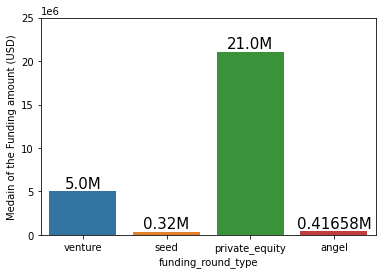

In [36]:
#Plot showing the representative values of each funding type
g = sns.barplot(data = InvestmentTypes,x='funding_round_type',y ='raised_amount_usd',estimator=np.median,ci=None)
g.ticklabel_format(scilimits = (6,6), axis='y')
plt.ylim(0, 25000000)
for bar in g.patches:  
    g.annotate(str(bar.get_height()/1000000)+"M",  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points')
g.set(ylabel = "Medain of the Funding amount (USD)")
plt.show(g)

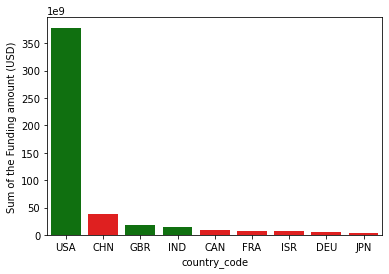

In [37]:
#Plot showing the total investment value of the top9 countries. Top3 english Speaking countries are highlighted in Green
clrs = ['green','red','green','green','red','red','red','red','red']
h=sns.barplot(data = top9,x='country_code',y ='raised_amount_usd',estimator=np.sum,order = Top9Countries,ci=None,palette= clrs)
h.ticklabel_format(scilimits = (9,9), axis='y')
h.set(ylabel = "Sum of the Funding amount (USD)")
plt.show(h)

In [38]:
#Combining the Top3 Countries and the top3 funding types
FinalDataFrame = [D1[D1.Main_Sector.apply(lambda x: x in D1Top3Sectors)],
                  D2[D2.Main_Sector.apply(lambda x: x in D2Top3Sectors)],
                  D3[D3.Main_Sector.apply(lambda x: x in D3Top3Sectors)]]
FinalDataFrame = pd.concat(FinalDataFrame)

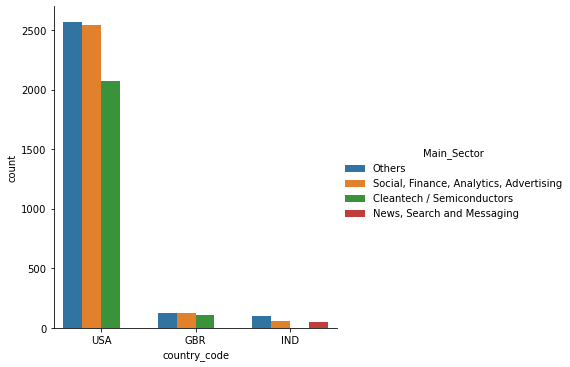

In [39]:
#Plot showing the number of investments in the top 3 sectors of the top3 countries
sns.catplot(x="country_code", hue="Main_Sector", kind="count", data=FinalDataFrame,
            hue_order = FinalDataFrame['Main_Sector'].value_counts().index)
